# Objective
We got a SAM file generated by the sequencing of a PCR sample.
The SAM file contains all sorts of reads with various lengths, presence or not of the PCR primers (complete and incomplete sequences), forward and reverse reads, and junk reads.
We want to generate a FASTA file that contains only the complete region of interest in a certain range of lenghts.

### Import all the needed packages

In [1]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio.Seq import reverse_complement as RC

# Create a sam file for the purpose of this exercise
The mock file matches the format and content of a real sam file.

### Define functions to create random genomic sequences, random names and the content of the sam file

In [2]:
def get_random_seq(read_length=10, cg_cont=.5):
    """This function creates a random DNA sequence of custom length and of custom GC content.
    
    Arguments:
    read_length: length of the sequence; default = 10 bases.
    cg_cont: fraction of G and C nucleotides; default = 0.5.
    """
    
    base_p = [(1 - cg_cont) / 2, (1 - cg_cont) / 2, cg_cont / 2, cg_cont / 2] # List of probability for each nucleotide
    return ''.join(np.random.choice(['A', 'T', 'C', 'G'], p=base_p, size=read_length)) # Create a random sequence (taking into account the desired proportion of each nucleotide) of defined length


def get_random_name(size=10, chars=string.ascii_uppercase + string.digits):
    """This function creates a random name of custom length and composed of upper case letters and digits by default.
    
    Arguments:
    size: length of the name; default = 10 characters.
    chars: types of characters included in the name; default = upper case letters and digits.
    """
    
    return ''.join(random.choice(chars) for _ in range(size)) # Create a random name of defined composition and length


def create_sam(n_reads=100, seq1='', seq2='', min_roi=200, max_roi=500):
    """This function creates a custom number of random sequencing reads in sam format. Reads incorporate two possible custom sequences.
    Only names and sequences are actually created. All other sam parameters (such as flag, PHRED score...) are left undefined using the '-' character.
    
    Arguments:
    n_reads: number of reads to create; default = 100.
    seq1: custom sequence 1 to incorporate in the reads; default = empty string.
    seq2: custom sequence 2 to incorporate in the reads; default = empty string.
    min_roi: min length of the region of intestest
    max_roi: max length of the region of intestest
    """

    reads = []
    names = []

    for _ in range(n_reads):
        reads.append(''.join([get_random_seq(random.randint(1, 50)),            # Append the list of reads composed of a random sequence of maximum 50 nucleotides, then
                              seq1,                                             # the defined sequence 1, then
                              get_random_seq(random.randint(min_roi, max_roi)), # a random sequence of min_roi to max_roi nucleotides, then
                              seq2,                                             # the defined sequence 2, then
                              get_random_seq(random.randint(1, 50))]))          # a random sequence of maximum 50 nucleotides
        names.append(get_random_name()) # Use the get_random_name() function to append the list of names

    d = {'QNAME': names,          # Create a dictionary composed of all fields defining a sam file and their content
         'FLAG': ['-'] * n_reads,
         'RNAME': ['-'] * n_reads,
         'POS': ['-'] * n_reads,
         'MAPQ': ['-'] * n_reads,
         'CIGAR': ['-'] * n_reads,
         'RNEXT': ['-'] * n_reads,
         'PNEXT': ['-'] * n_reads,
         'TLEN': ['-'] * n_reads,
         'SEQ': reads,
         'QUAL': ['-'] * n_reads}
    
    return pd.DataFrame(d) # Make the dictionary a dataframe

### Create the sam file

In [3]:
forward = 'aaaat' # Sequence of the forward primer of the region of interest
reverse = 'ccccg' # Sequence of the reverse primer of the region of interest

d = create_sam(n_reads=500, seq1=forward, seq2=RC(reverse))                  # Complete reads
d = pd.concat([d, create_sam(n_reads=500, seq1=reverse, seq2=RC(forward))])  # Complete reverse complement reads
d = pd.concat([d, create_sam(n_reads=250, seq1=forward)])                    # Incomplete reads containing forward primer only
d = pd.concat([d, create_sam(n_reads=250, seq1=reverse)])                    # Incomplete reads containing reverse primer only
d = pd.concat([d, create_sam(n_reads=1000, max_roi=3000)])                   # Random reads

testfile = "./test.sam" # Set sam file name and location
d.to_csv(testfile, sep='\t', index=False, header=False) # Write file

print(d.iloc[0,9]) # Print complete sequence of first read
d.info() # Get a summary of the properties of the dataframe
d.head() # Visualize head of the dataframe

GTCCTTGTGTCATACACCGTTGTCCGTCGTACTGCTAGGGaaaatGCAAACGTACTAGATAGGAGTATCATGACGCACTAAAATCCAAAGGCATTAAGACTGCTTTCATCACAACCTACCCGTCGCGCCGAATAAGCCCGACTACGGACATGAATGATTGGAGCGATCCAGCAGTGTACATGCGAATTTCTCCGTCGTATTGAGAATTGATTGGTCCTTTACGGATCGTCCATGTTACACGGAAGGTAGTGGAACGGCATGCACACGCcggggGTTGTAGAACCAATTTCATCGTGTGAAGATTGCCTCTT
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 999
Data columns (total 11 columns):
QNAME    2500 non-null object
FLAG     2500 non-null object
RNAME    2500 non-null object
POS      2500 non-null object
MAPQ     2500 non-null object
CIGAR    2500 non-null object
RNEXT    2500 non-null object
PNEXT    2500 non-null object
TLEN     2500 non-null object
SEQ      2500 non-null object
QUAL     2500 non-null object
dtypes: object(11)
memory usage: 314.4+ KB


,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL
0,0S3E5CVBE2,-,-,-,-,-,-,-,-,GTCCTTGTGTCATACACCGTTGTCCGTCGTACTGCTAGGGaaaatG...,-
1,BG9HG46QLJ,-,-,-,-,-,-,-,-,TTACCGTTATCGCGTTCCAACCGGAACTaaaatTTGGGGCCCCAGC...,-
2,8KMEVB91YI,-,-,-,-,-,-,-,-,TACGGGTATCCTATGGAACCACCCCAGACGTGGGGATTGTTCGGGT...,-
3,K49XVJ06FI,-,-,-,-,-,-,-,-,ACGAATCGGaaaatAGCACCTTCTAGCTTGCTCAATTCGACCTGAA...,-
4,VWJKQEA2E4,-,-,-,-,-,-,-,-,ATCCAGGGCTGCACCaaaatGCTTCTAGAGGTAGCCAGCATGACCT...,-


# Perform the analysis

### Define a function that trims sequencing reads

In [4]:
def shorten_read(read, primer, n=500):
    """This function trims reads before the starting position of a primer sequence and after a custom length.
    
    Arguments:
    read: a genomic sequence.
    primer: the sequence of a primer to be found in the read (defines the starting postition of the retained sequence).
    n: final length of the read; default = 500 bases.
    """
    read = read[read.find(primer):read.find(primer) + n] # Slice read from the position where primer sequence is found to that position + n bases
    return read # Return trimmed read

### Set parameters

In [5]:
infile = "test.sam" # Set input file
outfile = "test.clean.fa" # Set output file

# If analyzing a real file (not created previoulsy in this code), the following 2 commands have to be run
#forward = "" # Write forward primer sequence
#reverse = "" # Write reverse primer sequence

max_len = 400 # Set maximum length of the region of interest
min_len = 300 # Set minimum length of the region of interest

### Load data

In [6]:
data = pd.read_table(infile, sep="\t", header=None) # Read input file
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0S3E5CVBE2,-,-,-,-,-,-,-,-,GTCCTTGTGTCATACACCGTTGTCCGTCGTACTGCTAGGGaaaatG...,-
1,BG9HG46QLJ,-,-,-,-,-,-,-,-,TTACCGTTATCGCGTTCCAACCGGAACTaaaatTTGGGGCCCCAGC...,-
2,8KMEVB91YI,-,-,-,-,-,-,-,-,TACGGGTATCCTATGGAACCACCCCAGACGTGGGGATTGTTCGGGT...,-
3,K49XVJ06FI,-,-,-,-,-,-,-,-,ACGAATCGGaaaatAGCACCTTCTAGCTTGCTCAATTCGACCTGAA...,-
4,VWJKQEA2E4,-,-,-,-,-,-,-,-,ATCCAGGGCTGCACCaaaatGCTTCTAGAGGTAGCCAGCATGACCT...,-


### Select columns of interest

In [7]:
df = data[[0,9]] # Select 1st and 10th columns of the dataframe
df.columns = ["name","seq"] # Name the columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
name    2500 non-null object
seq     2500 non-null object
dtypes: object(2)
memory usage: 39.1+ KB


,name,seq
0,0S3E5CVBE2,GTCCTTGTGTCATACACCGTTGTCCGTCGTACTGCTAGGGaaaatG...
1,BG9HG46QLJ,TTACCGTTATCGCGTTCCAACCGGAACTaaaatTTGGGGCCCCAGC...
2,8KMEVB91YI,TACGGGTATCCTATGGAACCACCCCAGACGTGGGGATTGTTCGGGT...
3,K49XVJ06FI,ACGAATCGGaaaatAGCACCTTCTAGCTTGCTCAATTCGACCTGAA...
4,VWJKQEA2E4,ATCCAGGGCTGCACCaaaatGCTTCTAGAGGTAGCCAGCATGACCT...


### Plot distribution of read length

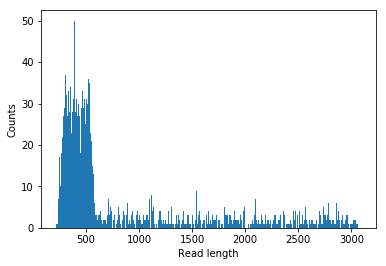

In [8]:
plt.hist(df['seq'].apply(len), bins=500)
plt.xlabel('Read length')
plt.ylabel('Counts')
plt.show()

### Select reads that contain the primer in their sequence

In [9]:
boo = [] # Create empty list
for i in df['seq']: # For each read in the dataframe
    boo.append(forward in i and RC(reverse) in i) # Append a boolean indicating if both primer sequences (forward and reverse complement of reverse) are found in the read
for_roi = df[boo].copy() # Subset the dataframe with only "True" reads / 
                         # .copy() avoids Panda's "SettingwithCopyWarning"

# Perform the same selection for reverse complement reads
boo = []
for i in df['seq']:
    boo.append(RC(forward) in i and reverse in i)
rev_roi = df[boo].copy()

rev_roi['seq'] = rev_roi['seq'].apply(RC) # Transform reverse reads into forward reads

# Let's make sure the reverse reads are properly reversed
print(rev_roi['seq'].head())

roi = pd.concat([for_roi, rev_roi]) # Concatenate the 2 subsets
roi.info()

500    TAACGCGTTAaaaatGTACGTCTACCGGAATGAAATTCTGACGTAA...
501    GTTCTAATGCTTAGTGGATCAGGCGAGGCAGCGATGTTTGCaaaat...
502    GTCGTGGTATGACGATTATTGGGCGCAAaaaatACGTCACGAGCCC...
503    TCAAGCTAGATATaaaatTTGATGTGTAATGCTTCTGTGCTTGATC...
504    ACCaaaatCTCATTGTTGTCCGAATGTTTTTCTAGTGTCCCCCAGT...
Name: seq, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
name    1000 non-null object
seq     1000 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


### Trim the reads

In [10]:
roi['short'] = roi.apply(lambda x: shorten_read(read=x['seq'], primer=forward, n=max_len), axis=1) # Apply row by row the trimming function to the column containing the read sequences and create a new column for the trimmed reads

roi = roi[roi['short'].apply(len) >= min_len] # Select reads that are longer than the minimum length
roi = roi[["name", "short"]] # Keep only the read names and the short sequences

# Make sure the trimming worked properly
print(roi.iloc[0,1])
print(len(roi.iloc[0,1]))

aaaatTTGGGGCCCCAGCCAATGCGGAATTATCCCTAAACTCTACGAGTGCTTCACCGGAGCTCCAGACGGAAACTCGTCAATTTTTACACTTAATGGAGAGTCAGTGGGTGGTAGTATGAACCCTACTTAAAATATGTCGGGCATACAACCGTGACAATCGAGGCGTAATATGGAGCCGTTTGCCCGATTGCAAGACGCTCCATATGAGGCCTAACTAATAGCGAGTATGCGTATTCTCACGACCAATCGAGAGGGAAAACAACAATCGATCCGAACGAGTGCACCAGCGAAGATCGAATTTTAGGTCATTACTCCTGGAAAAAGTCTAATTACCCCCCCACAGATATAACGCGTTCAAGCAAAGTGAGTATGAAACAGCGAGATTTGTACACTAATCT
400


### Plot distribution of read length in the final dataset

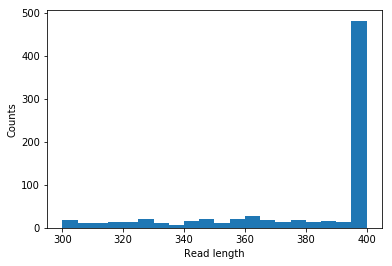

In [11]:
plt.hist(roi['short'].apply(len), bins=20)
plt.xlabel('Read length')
plt.ylabel('Counts')
plt.show()

### Create output fasta file

In [12]:
output = roi.apply(lambda x: f">{x[0]}\n{x[1]}\n", axis=1) # Put read name and sequence in fasta format
fa = ""
for i in output:
    fa = fa + i # Append all reads in fasta format into a single string

with open(outfile, "w") as f:
    f.write(fa)